# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load/Preprocess the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import statistics
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.stats import iqr

In [2]:
zillow_df = pd.read_csv("zillow_data.csv")
pd.set_option('display.max_columns', 500)
zillow_df#['RegionName'].unique()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [3]:
def get_datetimes(df_column):
    return pd.to_datetime(df_column, format='%Y-%m')

In [4]:
with pd.option_context("display.max_rows", 1000):
    display(zillow_df.isna().sum())

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01     

In [5]:
zillow_df = zillow_df.dropna()

with pd.option_context("display.max_rows", 1000):
    display(zillow_df.isna().sum())

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
1998-03       0
1998-04       0
1998-05       0
1998-06       0
1998-07       0
1998-08       0
1998-09       0
1998-10       0
1998-11       0
1998-12       0
1999-01       0
1999-02       0
1999-03       0
1999-04       0
1999-05       0
1999-06       0
1999-07       0
1999-08       0
1999-09       0
1999-10       0
1999-11       0
1999-12       0
2000-01       0
2000-02       0
2000-03       0
2000-04       0
2000-05       0
2000-06       0
2000-07       0
2000-08       0
2000-09       0
2000-10       0
2000-11 

In [6]:
zillow_df.shape

(12895, 272)

In [7]:
zillow_df.RegionID = zillow_df.RegionID.astype(str)
zillow_df.RegionName = zillow_df.RegionName.astype(str)

/home/james/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


# Step 2: Filter for Chosen Zipcodes

## 2.1 Process

#### Summary

As described with more detail in the appended blog post, the top 5 best zipcodes will be filtered from the dataframe using a weighted Return on Investment (ROI) calculation. This will be done by:
   1. splitting our overall time horizon our 22 years of housing data into two subsets 
       i. post-2008
       ii.pre-2008
   2. calculating the ROI for each quartile
   3. calculating the weighted average of all quartile ROIs
   
A detailed account of the reasoning behind why the specific two subsets were chosen can be found in the blog post linked above.

#### Step 1: Split data into time periods

In [8]:
date_cols = zillow_df.iloc[:,7:]
date_cols.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,806100.0,810900.0,817400.0,826800.0,837900.0,848100.0,85380

#### Step 2: Calculate Profitability per period

In [9]:
def get_ROI(df):
    #balances
    bb = df.iloc[:,0].values #beginning balance
    eb = df.iloc[:,-1].values #ending balance
    
    bb_column = df.columns[0]
    eb_column = df.columns[-1]
    
    #time
    time_delta = get_datetimes(eb_column) - get_datetimes(bb_column)
    time_delta_yrs = time_delta.days/365
    n = time_delta_yrs
    
    #formula    
    ROI = eb/bb
    ROI_final = ROI-1
    #print(ROI_annual_final)
    return ROI_final * 100

def get_IQR(df):
    df_rows = df.shape[0]
    
    iqrs_master_list = []
    
    i=0
    while i < df_rows:
        house_prices = df.iloc[i].values
        house_price_iqr = iqr(house_prices)
        iqrs_master_list.append(house_price_iqr)
        i+=1

    return iqrs_master_list
            
df_ROI = get_ROI(date_cols)
IQR = get_IQR(date_cols)

#date_cols.iloc[0].values
print(df_ROI)
print(IQR)

[208.37821664  36.52948664  56.79657795 ... 143.58144552 133.62521891
 102.49433107]
[216500.0, 24800.0, 59600.0, 284600.0, 35400.0, 19700.0, 152600.0, 230900.0, 16500.0, 562700.0, 324000.0, 107100.0, 324100.0, 264200.0, 21600.0, 256000.0, 137700.0, 34700.0, 21500.0, 129000.0, 2165300.0, 35400.0, 25300.0, 18600.0, 53300.0, 9500.0, 182000.0, 49900.0, 262100.0, 746200.0, 26400.0, 17100.0, 382700.0, 18000.0, 156800.0, 34500.0, 24300.0, 33800.0, 218300.0, 40600.0, 37600.0, 48300.0, 15900.0, 27600.0, 303100.0, 380900.0, 51600.0, 371800.0, 125100.0, 38100.0, 35000.0, 149100.0, 41700.0, 72000.0, 91200.0, 588000.0, 273700.0, 80700.0, 620200.0, 8700.0, 115900.0, 23300.0, 273000.0, 40100.0, 85800.0, 231600.0, 17800.0, 32500.0, 340400.0, 35200.0, 245300.0, 140600.0, 29900.0, 432500.0, 316300.0, 24700.0, 55000.0, 179600.0, 18300.0, 19700.0, 81200.0, 108300.0, 1164700.0, 287300.0, 180300.0, 47100.0, 94900.0, 94300.0, 201700.0, 32300.0, 19800.0, 145500.0, 212000.0, 227100.0, 265900.0, 45000.0, 32100

In [10]:
metric_data = {'ROI': df_ROI, 'IQR': IQR}
metric_df = pd.DataFrame(metric_data)

metric_df['Return/Risk'] = metric_df['ROI']/metric_df['IQR']

metric_df#['Return/Risk']

,ROI,IQR,Return/Risk
0,208.378217,216500.0,0.000962
1,36.529487,24800.0,0.001473
2,56.796578,59600.0,0.000953
3,162.397109,284600.0,0.000571
4,57.179819,35400.0,0.001615
5,72.947368,19700.0,0.003703
6,173.315893,152600.0,0.001136
7,261.570439,230900.0,0.001133
8,84.696017,16500.0,0.005133
9,397.845953,562700.0,0.000707


In [18]:
return_risk_metric = metric_df['Return/Risk']
ROI = metric_df['ROI']
IQR = metric_df['IQR']

Now that we've generated our weighted average ROI metric for each row of our dataframe, we just need to add it to the dataframe as a column and sort by it to get our top 5 best zipcodes.

In [19]:
zillow_df['Return by Unit Risk Metric'] = return_risk_metric
#zillow_df['ROI'] = ROI
#zillow_df['IQR'] = IQR

zillow_df_sorted = zillow_df.sort_values(['Return by Unit Risk Metric'], ascending=False)

zillow_df_sorted
top5_zipcodes_df = zillow_df_sorted.iloc[0:5,:]

top5_zipcodes_df

/home/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Return by Unit Risk Metric
10019,97273,93445,Oceano,CA,San Luis Obispo,San Luis Obispo,10020,132300.0,132000.0,131700.0,131400.0,131100.0,130900.0,130900.0,130900.0,131100.0,131400.0,131800.0,132000.0,132200.0,132500.0,132900.0,133200.0,133700.0,134300.0,135100.0,136000.0,137100.0,138300.0,139400.0,140400.0,141500.0,142500.0,143500.0,144600.0,145800.0,147000.0,148300.0,149700.0,151400.0,153100.0,154800.0,156200.0,157700.0,159200.0,160700.0,162300.0,164000.0,165700.0,167700.0,169800.0,172200.0,174700.0,177100.0,179400.0,181600.0,183800.0,186000.0,188300.0,190700.0,193300.0,196000.0,199000.0,202100.0,205300.0,208400.0,211400.0,214400.0,217200.0,220100.0,223000.0,226000.0,229100.0,232500.0,236100.0,239800.0,243600.0,247200.0,250700.0,254000.0,257200.0,260300.0,263500.0,266800.0,270400.0,274100.0,278600.0,283900.0,289400.0,294500.0,299900.0,305600.0,311200.0,316800.0,322000.0,326700.0,331100.0,335200.0,339100.0,342900.0,347300.0,352500.0,358900.0,366700.0,375600.0,385500.0,396000.0,406200.0,415700.0,424400.0,432000.0,438800.0,445500.0,452100.0,458900.0,465900.0,473100.0,480400.0,487200.0,492900.0,497900.0,502200.0,505300.0,506700.0,506700.0,505200.0,501500.0,495400.0,488000.0,480500.0,472500.0,464400.0,457300.0,451500.0,446500.0,441800.0,437800.0,435000.0,432700.0,430600.0,429600.0,429900.0,429900.0,428800.0,426900.0,424600.0,421900.0,418400.0,415000.0,412400.0,409400.0,404900.0,400200.0,395700.0,389300.0,380700.0,371900.0,364300.0,357400.0,349900.0,342300.0,335100.0,327100.0,318200.0,309300.0,303400.0,301600.0,302600.0,304200.0,306200.0,307700.0,309700.0,310900.0,309900.0,310300.0,314800.0,317200.0,312100.0,304400.0,298900.0,294600.0,288400.0,281900.0,277700.0,275100.0,272200.0,268600.0,265600.0,263600.0,262400.0,262000.0,261800.0,261200.0,260500.0,259900.0,258500.0,257500.0,255700.0,252800.0,2

Great, here they are. For convenience we'll store them in list form below

In [20]:
top5_zipcodes = list(top5_zipcodes_df['RegionName'].values)
top5_cities = list(top5_zipcodes_df['City'].values)

top5_zipcodes
#top5_cities

['93445', '16841', '38023', '23075', '60420']

# Step 3: Reshape from Wide to Long Format

As specified above, to model our data it needs to be reshaped. This will be performed using Pandas' melt functionality.

In [21]:
def melt_data(df, values):
    melted = pd.melt(df, id_vars=['RegionName','City','State','Metro','CountyName','RegionID','SizeRank'], value_vars = values, var_name ='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    #melted = melted.dropna(subset=['value'])
    return melted#.groupby('time').aggregate({'value':'mean'})

In [22]:
#Melt df
date_columns = list(zillow_df.columns[7:-3])
top5_zipcodes_df_melted = melt_data(top5_zipcodes_df,date_columns)
top5_zipcodes_df_melted = top5_zipcodes_df_melted.rename(index=str, columns={"value": "price"})

top5_zipcodes_df_melted

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,price
0,93445,Oceano,CA,San Luis Obispo,San Luis Obispo,97273,10020,1996-04-01,132300.0
1,16841,Howard,PA,State College,Centre,64765,10852,1996-04-01,33700.0
2,38023,Drummonds,TN,Memphis,Tipton,74595,10987,1996-04-01,59500.0
3,23075,Highland Springs,VA,Richmond,Henrico,67518,8378,1996-04-01,62400.0
4,60420,Dwight,IL,Pontiac,Livingston,84472,10784,1996-04-01,68600.0
5,93445,Oceano,CA,San Luis Obispo,San Luis Obispo,97273,10020,1996-05-01,132000.0
6,16841,Howard,PA,State College,Centre,64765,10852,1996-05-01,34200.0
7,38023,Drummonds,TN,Memphis,Tipton,74595,10987,1996-05-01,60100.0
8,23075,Highland Springs,VA,Richmond,Henrico,67518,8378,1996-05-01,62400.0
9,60420,Dwight,IL,Pontiac,Livingston,84472,10784,1996-05-01,68800.0


The data is now in a model-ready format.

# Step 4: EDA and Visualization

In [23]:
def get_df_at_zipcode(zipcode):
    zipcode_df = top5_zipcodes_df_melted[top5_zipcodes_df_melted['RegionName']==zipcode]
    zipcode_timePrice = zipcode_df.iloc[:,-2:]
    zipcode_timePrice = zipcode_timePrice.set_index('time')
    
    return zipcode_timePrice#.plot()

def visualize(dataframe):
    dataframe.plot(figsize=(15,13))
    plt.legend(['Westmoreland, PA (15681)', 'Westmoreland, PA (15697)','Carter, OK', 'Ottawa, OK', 'Westmoreland, PA (15627)'])
    plt.ylabel('Price')
    
def get_prices_at_zipcode(zipcode):
    df_60657 = top5_zipcodes_df_melted[top5_zipcodes_df_melted['RegionName'] == zipcode]
    df_60657 = df_60657.set_index(df_60657['time'])
    return pd.DataFrame(df_60657['price'])

In [31]:
df_93445 = get_prices_at_zipcode('93445')
df_16841 = get_prices_at_zipcode('16841')
df_38023 = get_prices_at_zipcode('38023')
df_23075 = get_prices_at_zipcode('23075')
df_60420 = get_prices_at_zipcode('60420')

top_zips_df = pd.concat([df_93445, df_16841, df_38023, df_23075, df_60420], axis=1) #Creating a dataframe with top five zips time series

print(top_zips_df)
top_zips_df.columns=[93445, 16841, 38023, 23075, 60420]
top_zips_df.head()

               price     price     price     price     price
time                                                        
1996-04-01  132300.0   33700.0   59500.0   62400.0   68600.0
1996-05-01  132000.0   34200.0   60100.0   62400.0   68800.0
1996-06-01  131700.0   34600.0   60600.0   62500.0   69100.0
1996-07-01  131400.0   35000.0   61200.0   62500.0   69400.0
1996-08-01  131100.0   35500.0   61700.0   62600.0   69800.0
1996-09-01  130900.0   36000.0   62300.0   62700.0   70100.0
1996-10-01  130900.0   36500.0   62800.0   62900.0   70400.0
1996-11-01  130900.0   37200.0   63300.0   63100.0   70700.0
1996-12-01  131100.0   38200.0   63800.0   63400.0   71300.0
1997-01-01  131400.0   39200.0   64300.0   63600.0   71800.0
1997-02-01  131800.0   40100.0   64700.0   63900.0   72400.0
1997-03-01  132000.0   41000.0   64900.0   64200.0   72900.0
1997-04-01  132200.0   41900.0   65100.0   64500.0   73500.0
1997-05-01  132500.0   42800.0   65300.0   64800.0   74100.0
1997-06-01  132900.0   4

,93445,16841,38023,23075,60420
time,,,,,
1996-04-01,132300.0,33700.0,59500.0,62400.0,68600.0
1996-05-01,132000.0,34200.0,60100.0,62400.0,68800.0
1996-06-01,131700.0,34600.0,60600.0,62500.0,69100.0
1996-07-01,131400.0,35000.0,61200.0,62500.0,69400.0
1996-08-01,131100.0,35500.0,61700.0,62600.0,69800.0


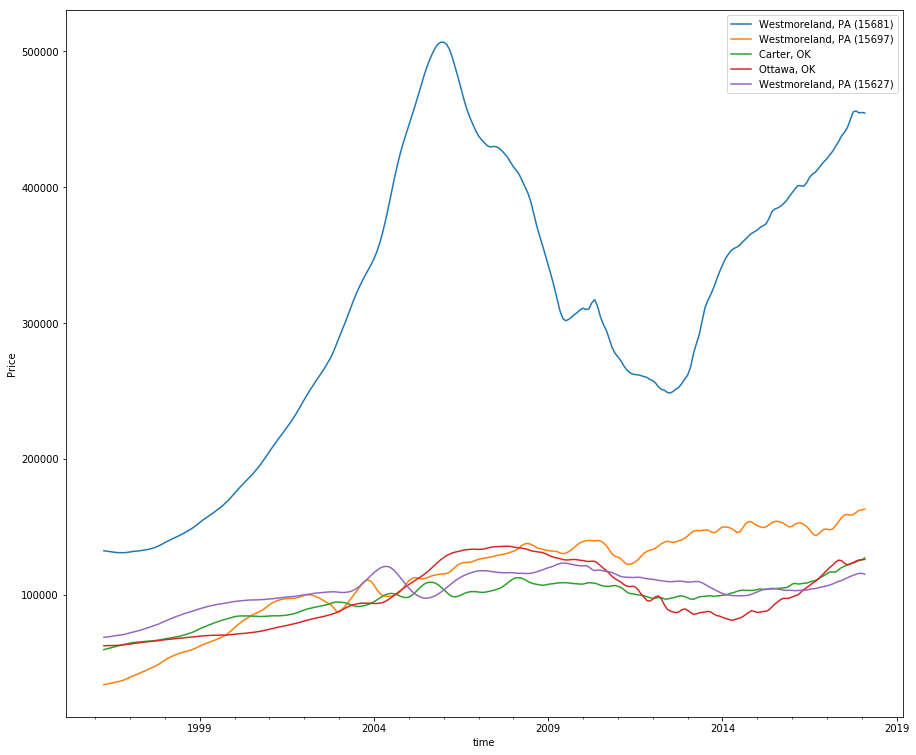

In [32]:
visualize(top_zips_df)

# Step 5: Managing Stationarity 

### 5.1 Testing Stationarity Visually

In [33]:
def visualize_rollingmean_std(zipcode):
    zipcode_df = get_df_at_zipcode(zipcode)
    rolmean = zipcode_df.rolling(window = 8, center = False).mean()
    rolstd = zipcode_df.rolling(window = 8, center = False).std()

    #Visualize stationarity check
    orig = plt.plot(zipcode_df, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'{zipcode} zipcode: checking stationarity ')
    plt.show();

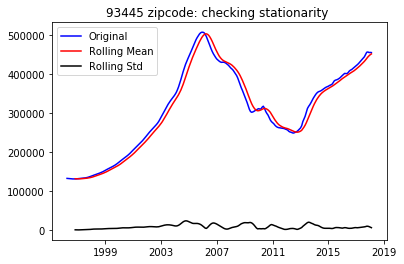

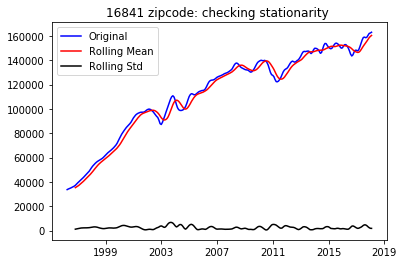

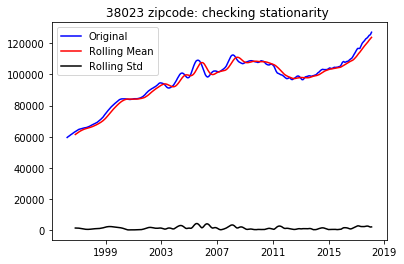

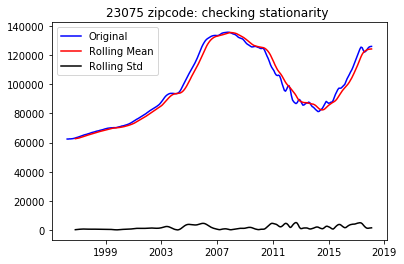

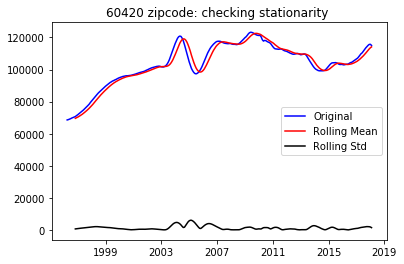

In [34]:
for t in top5_zipcodes:
    visualize_rollingmean_std(t)

From the visualizations above, we can see that for each of our top 5 zipcodes the mean of the data does not appear constant over time, meaning our time series do not appear stationary. The variations in the mean could, however, be a product of randomness. To determine whether the roling mean has statistically significant variation across time we will our data through the Dickey Fuller statistical test.

### 5.2 Testing Stationarity with the Dicky-Fuller test

In [36]:
def stationarity_check(zipcode,transform=None):
    '''Transforms and runs Dicky-Fuller test on data'''
    if transform == None:
        zipcode_df = get_df_at_zipcode(zipcode)
    elif transform == 'log':
        zipcode_df = get_logged_df_at_zipcode(zipcode)
    elif transform == 'data minus rolling mean':
        zipcode_df = get_data_minus_rollingMean(zipcode)
    elif transform == 'exponential weighted mean':
        zipcode_df = get_exponential_weightedMean(zipcode)
    elif transform == 'difference':
        zipcode_df_1 = get_data_minus_rollingMean(zipcode).diff(periods=18)
        zipcode_df = zipcode_df_1.dropna() 
    
    dftest = adfuller(zipcode_df['price'].values)
    
    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(f'---Dickey Fuller Test for pricing data of zipcode {zipcode}---')
    print(dfoutput)
    print('    ')
    
    
    #Visualize stationarity check
    rolmean = zipcode_df.rolling(window = 8, center = False).mean()
    rolstd = zipcode_df.rolling(window = 8, center = False).std()
    orig = plt.plot(zipcode_df, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'{zipcode} zipcode: checking stationarity ')
    plt.show();

---Dickey Fuller Test for pricing data of zipcode 93445---
Test Statistic                  -2.294761
p-value                          0.173663
#Lags Used                      16.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64
    


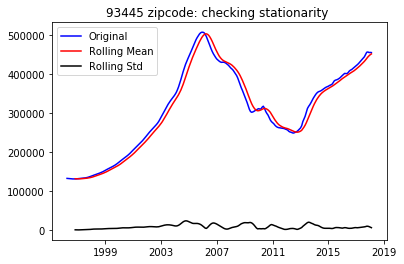

---Dickey Fuller Test for pricing data of zipcode 16841---
Test Statistic                  -2.620145
p-value                          0.088905
#Lags Used                       9.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
    


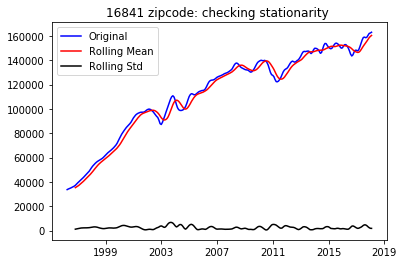

---Dickey Fuller Test for pricing data of zipcode 38023---
Test Statistic                  -0.602599
p-value                          0.870394
#Lags Used                      12.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64
    


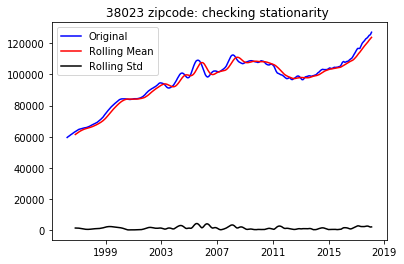

---Dickey Fuller Test for pricing data of zipcode 23075---
Test Statistic                  -2.068274
p-value                          0.257461
#Lags Used                       9.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
    


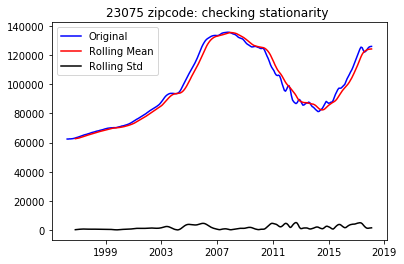

---Dickey Fuller Test for pricing data of zipcode 60420---
Test Statistic                  -2.960822
p-value                          0.038719
#Lags Used                       5.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64
    


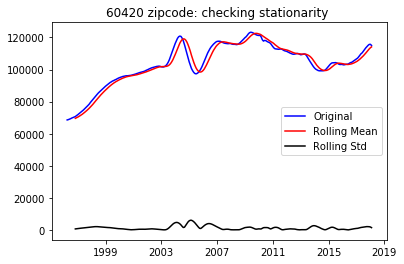

In [37]:
for t in top5_zipcodes:
    stationarity_check(t,None)

In each of our tests, the p-value is significantly greater than 0.05 so we can determine that data is not stationary. It is also very clearly seasonal, with each zipcode displaying a significant dip after 2008 presumably as a result of the financial crisis.

### Detrend Data

#### Log

Let's take the logarithm of our data to attempt to make this seasonal and non-stationary data more uniform.

In [38]:
def get_logged_df_at_zipcode(zipcode):
    zipcode_df = get_df_at_zipcode(zipcode)
    return np.log(zipcode_df)#.plot()

---Dickey Fuller Test for pricing data of zipcode 93445---
Test Statistic                  -2.562067
p-value                          0.101093
#Lags Used                      16.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64
    


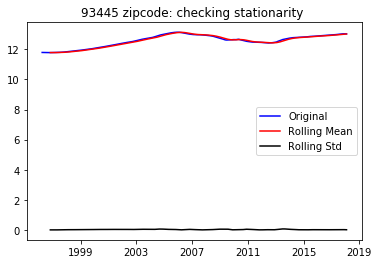

---Dickey Fuller Test for pricing data of zipcode 16841---
Test Statistic                  -4.975959
p-value                          0.000025
#Lags Used                       9.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
    


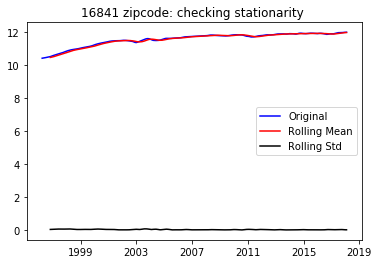

---Dickey Fuller Test for pricing data of zipcode 38023---
Test Statistic                  -1.269154
p-value                          0.643164
#Lags Used                      12.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64
    


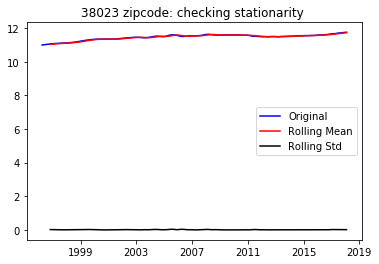

---Dickey Fuller Test for pricing data of zipcode 23075---
Test Statistic                  -2.046407
p-value                          0.266603
#Lags Used                       9.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
    


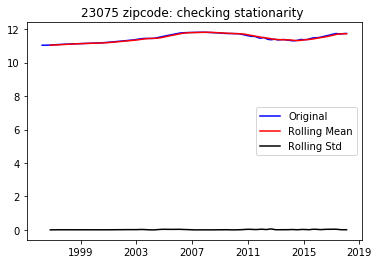

---Dickey Fuller Test for pricing data of zipcode 60420---
Test Statistic                  -3.488864
p-value                          0.008278
#Lags Used                       6.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64
    


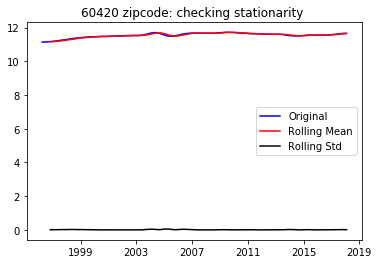

In [39]:
for t in top5_zipcodes:
    stationarity_check(t,'log')

There's a clear improvement to the seasonality and potentially stationarity. The mean is now very close to constant across time albeit with a slight upward trend.

Upon further inspection with our Dickey-Fuller test however, it's clear the data is in fact not stationary as the p-value for each zip code is above the standard mark of 0.05.

Let's try a different technique - subtracting the rolling mean from our time series in an attempt to flatten out any trends.

#### Rolling Mean

In [40]:
def get_rolling_mean_at_zipcode(zipcode):
    rolling_zip_df = get_df_at_zipcode(zipcode).rolling(window=5,center=False).mean()
    rolling_zip_df.dropna(inplace=True)
    return rolling_zip_df

def get_data_minus_rollingMean(zipcode):
    data_minus_rollingMean_df = get_df_at_zipcode(zipcode) - get_rolling_mean_at_zipcode(zipcode)
    data_minus_rollingMean_df = data_minus_rollingMean_df.dropna()
    #data_minus_rollingMean_df = data_minus_rollingMean_df#.diff(periods=10).dropna()
    
    return data_minus_rollingMean_df

---Dickey Fuller Test for pricing data of zipcode 93445---
Test Statistic                  -2.000023
p-value                          0.286563
#Lags Used                      16.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64
    


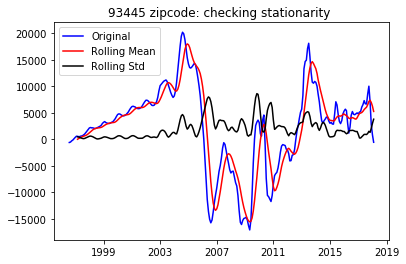

---Dickey Fuller Test for pricing data of zipcode 16841---
Test Statistic                -6.337649e+00
p-value                        2.804870e-08
#Lags Used                     6.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
    


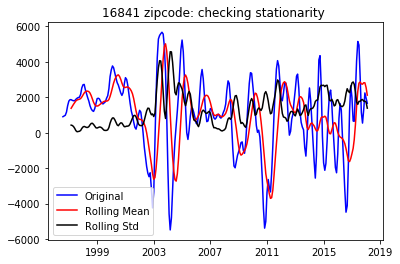

---Dickey Fuller Test for pricing data of zipcode 38023---
Test Statistic                  -2.107569
p-value                          0.241482
#Lags Used                      10.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64
    


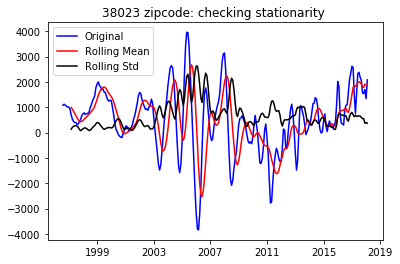

---Dickey Fuller Test for pricing data of zipcode 23075---
Test Statistic                  -2.023156
p-value                          0.276513
#Lags Used                       9.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
    


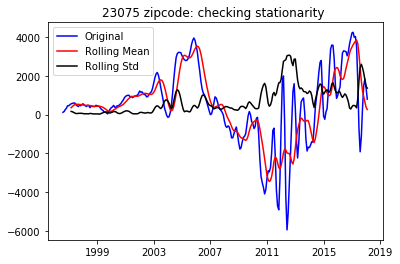

---Dickey Fuller Test for pricing data of zipcode 60420---
Test Statistic                -6.157424e+00
p-value                        7.311123e-08
#Lags Used                     3.000000e+00
Number of Observations Used    2.550000e+02
Critical Value (1%)           -3.456257e+00
Critical Value (5%)           -2.872942e+00
Critical Value (10%)          -2.572846e+00
dtype: float64
    


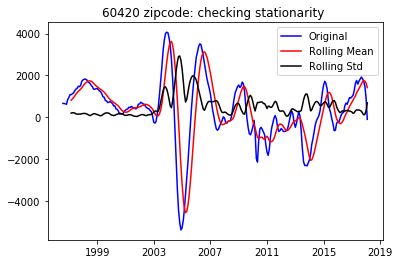

In [41]:
for t in top5_zipcodes:
    stationarity_check(t,'data minus rolling mean')

The data appears stationary but still does not satisfy the 0.05 p-value requirement of the Dickey-Fuller test.

In [42]:
def get_exponential_weightedMean(zipcode):
    zipcode_df = get_df_at_zipcode(zipcode)
    return np.log(zipcode_df).ewm(halflife = 4).mean()

def get_differenced_data(zipcode):
    differenced_df = get_data_minus_rollingMean(zipcode).diff(periods=10)
    differenced_df = differenced_df.dropna()
    
    return differenced_df

Let's try another commonly used technique, the exponential weighted mean which will give a greater weight to the more recent values of the time series.

#### Weighted Rolling Mean

---Dickey Fuller Test for pricing data of zipcode 93445---
Test Statistic                  -2.637402
p-value                          0.085511
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64
    


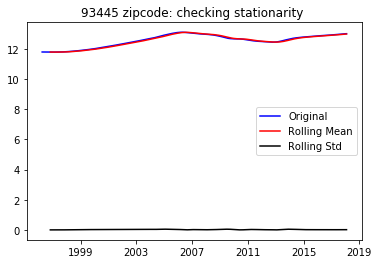

---Dickey Fuller Test for pricing data of zipcode 16841---
Test Statistic                  -3.529983
p-value                          0.007250
#Lags Used                      10.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64
    


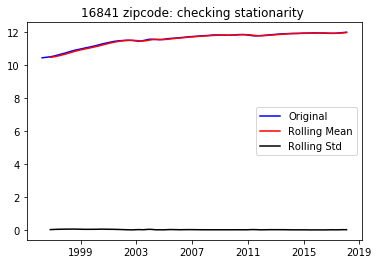

---Dickey Fuller Test for pricing data of zipcode 38023---
Test Statistic                  -1.527208
p-value                          0.520011
#Lags Used                      13.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
    


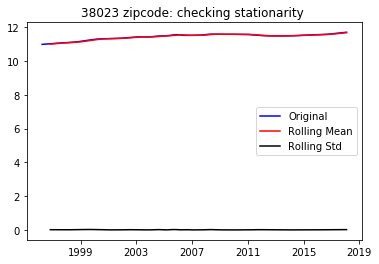

---Dickey Fuller Test for pricing data of zipcode 23075---
Test Statistic                  -2.405485
p-value                          0.140194
#Lags Used                      11.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
    


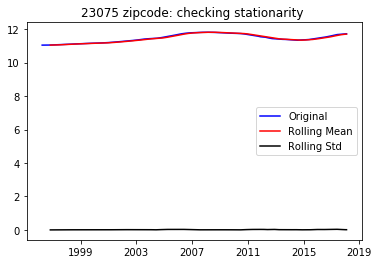

---Dickey Fuller Test for pricing data of zipcode 60420---
Test Statistic                  -3.748073
p-value                          0.003486
#Lags Used                       6.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64
    


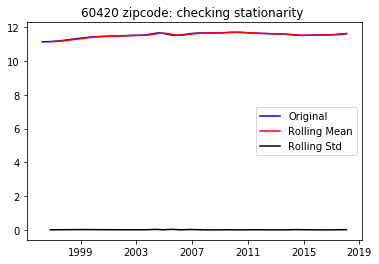

In [43]:
for t in top5_zipcodes:
    stationarity_check(t,'exponential weighted mean')

again, still does not satisfy the p-value. Let's move on to differencing

#### Differencing

---Dickey Fuller Test for pricing data of zipcode 93445---
Test Statistic                  -3.627547
p-value                          0.005256
#Lags Used                      15.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
    


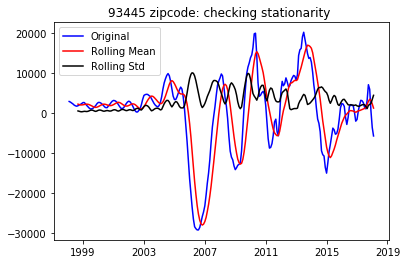

---Dickey Fuller Test for pricing data of zipcode 16841---
Test Statistic                  -4.633120
p-value                          0.000112
#Lags Used                      13.000000
Number of Observations Used    227.000000
Critical Value (1%)             -3.459490
Critical Value (5%)             -2.874358
Critical Value (10%)            -2.573602
dtype: float64
    


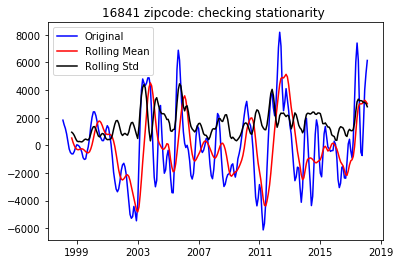

---Dickey Fuller Test for pricing data of zipcode 38023---
Test Statistic                  -5.261610
p-value                          0.000007
#Lags Used                      15.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
    


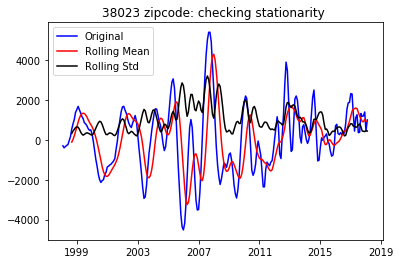

---Dickey Fuller Test for pricing data of zipcode 23075---
Test Statistic                  -3.286168
p-value                          0.015508
#Lags Used                      13.000000
Number of Observations Used    227.000000
Critical Value (1%)             -3.459490
Critical Value (5%)             -2.874358
Critical Value (10%)            -2.573602
dtype: float64
    


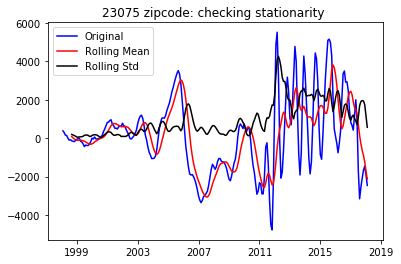

---Dickey Fuller Test for pricing data of zipcode 60420---
Test Statistic                -7.597087e+00
p-value                        2.444160e-11
#Lags Used                     7.000000e+00
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64
    


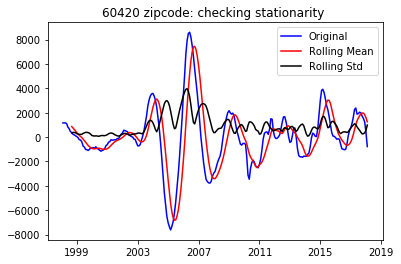

In [44]:
for t in top5_zipcodes:
    stationarity_check(t,'difference')

Success. The rolling mean shows no significant pattern across time and all zipcode p-values are below 0.05.

# Step 5: ARIMA Modeling

## 5.1 ACF 

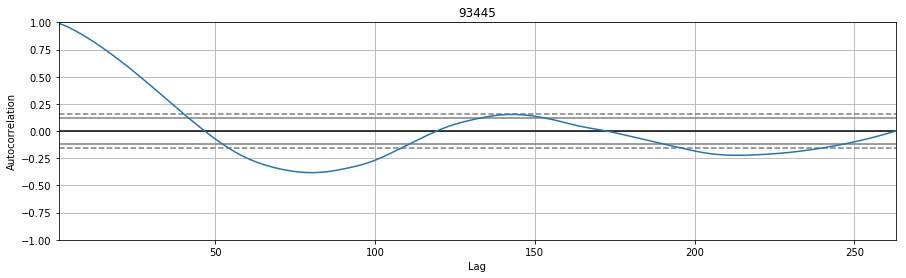

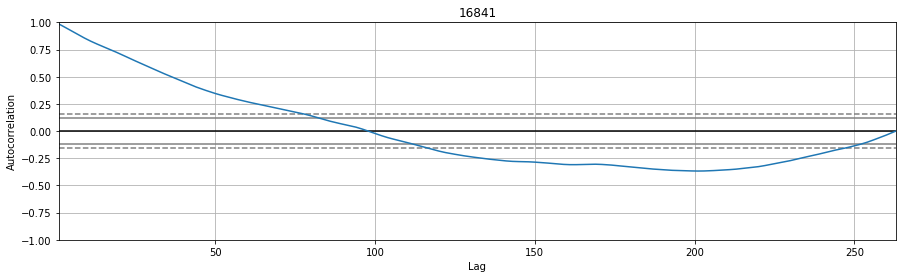

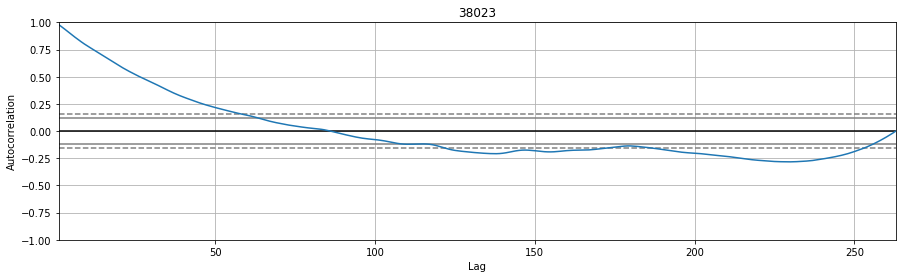

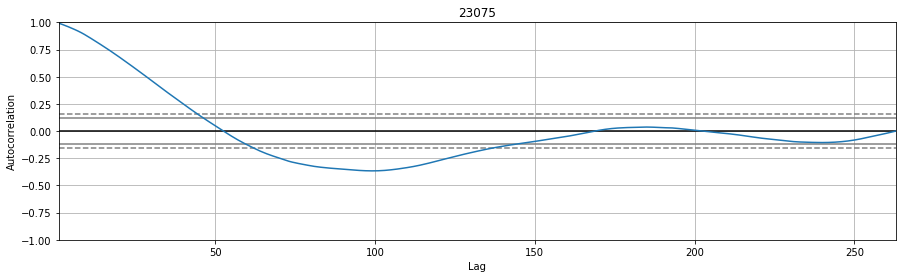

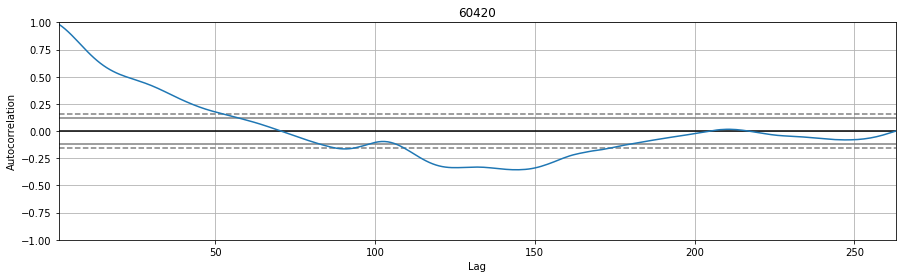

In [45]:
for t in top5_zipcodes:
    plt.figure(figsize=(15,4))
    df=autocorrelation_plot(get_df_at_zipcode(t))
    plt.title(t)

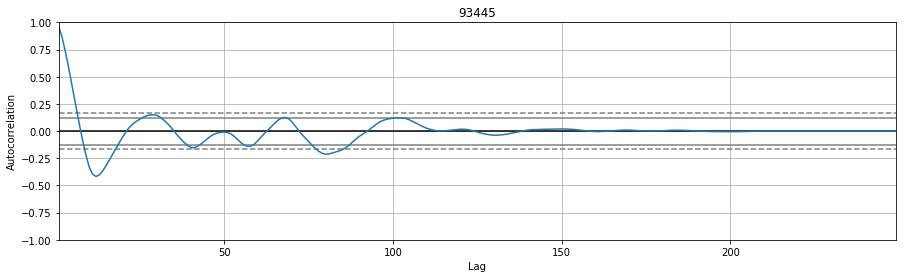

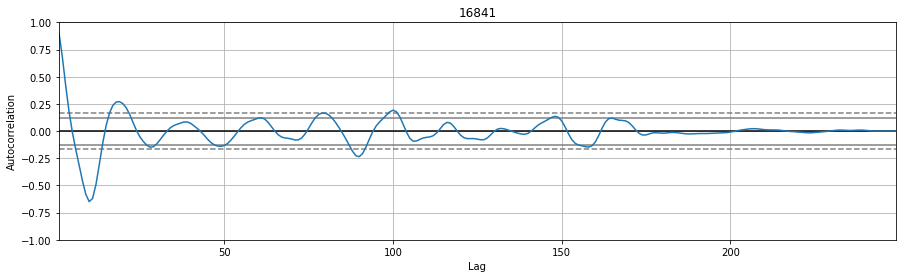

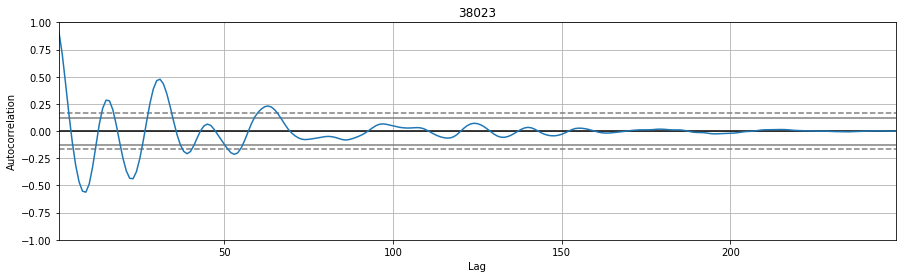

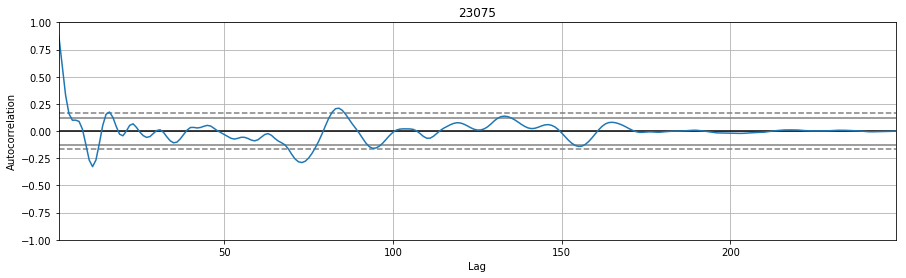

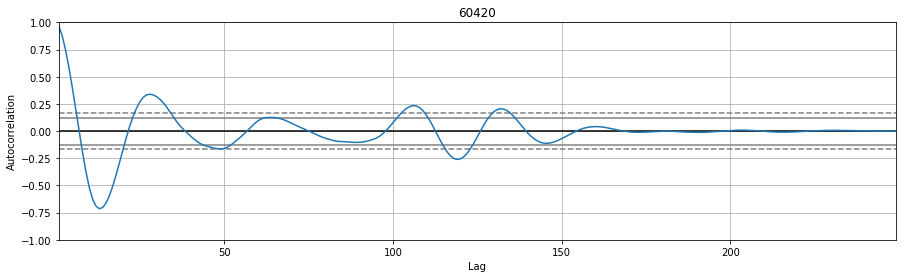

In [46]:
for t in top5_zipcodes:
    plt.figure(figsize=(15,4))
    df=autocorrelation_plot(get_differenced_data(t))
    plt.title(t)

Our undifferenced model has very high initial autocorrelation preceding a decay. This indicates there is some significant white noise in the model. After differencing it very clearly gravitates towards an autocorrelation of 0 despite fluctuation.

In [47]:
def get_results(df, preds, name):
    if 'pandas.core.frame.DataFrame' in str(type(df)):
        current_price = df.iloc[-1].price
    else:
        current_price = df[-1]
    year_later = preds[11]
    year_3_val = preds[35]
    year_5_val = preds[-1]
    print("Current Avg Median Home Value in {}: ${:.2f}".format(name, current_price))
    print("Predicted Avg Median Home Value for {} in April 2019: ${:.2f}".format(name, year_later))
    expected_appreciation_value_1 = year_later - current_price
    expected_appreciation_percent_1 = expected_appreciation_value_1 / current_price
    expected_appreciation_value_3 = year_3_val - current_price
    expected_appreciation_percent_3 = expected_appreciation_value_3 / current_price
    expected_appreciation_value_5 = year_5_val - current_price
    expected_appreciation_percent_5 = expected_appreciation_value_5 / current_price
    print("Expected property value appreciation for 1 year in {} :  ${:.2f}".format(name, expected_appreciation_value_1))
    print("Expected Return on Investment after 1 year:  {:.4f}%".format(expected_appreciation_percent_1 * 100))
    print("Expected property value appreciation for 3 years in {} :  ${:.2f}".format(name, expected_appreciation_value_3))
    print("Expected Return on Investment after 5 years:  {:.4f}%".format(expected_appreciation_percent_3 * 100))
    print("Expected property value appreciation for 10 years in {} :  ${:.2f}".format(name, expected_appreciation_value_5))
    print("Expected Return on Investment after 10 years:  {:.4f}%".format(expected_appreciation_percent_5 * 100))

In [48]:
def fit_model(df, zipcode, show_graph=True):
    # Get only the values from the dataframe
    vals = df.price.values
    # Split the data into training and testing sets by holding out dates past a certain point. Below, we use index 261 for
    # this split
    train = vals[:50]
    test = vals[50:]
    # Use a list comprehension to create a "history" list using our training data values
    history = [i for i in train]
    # initialize an empty list for predictions
    preds = []
    # loop through a list the length of our training set
    
    #i=0
    for i in range(len(test)):
        # create an ARIMA model and pass in our history list. Also set `order=(0,1,1)` (order refers to AR and MA params--
        # see statsmodels documentation for ARIMA for more details)
        model = ARIMA(history, order=(1,1,0))
        # Fit the model we just created
        fitted_model = model.fit(disp=0)
        
        # Get the forecast of the next value from our fitted model, and grab the first value to use as our 'y-hat' prediction
        output = fitted_model.forecast()
        y_hat = output[0]
        # append y_hat to our list of predictions
        preds.append(y_hat)
        obs = test[i]
        # Get the actual ground truth value for this datetime and append it to the history array
        history.append(obs)
    # get the forecast for the next three years (1 month==1 timestep in our data)
    #model = ARIMA(history, order=(0,1,1))
    #fitted_model = model.fit(disp=0)
    future_preds = fitted_model.forecast(steps=120)[0]
    # Visualize the ARIMA model's predictions vs the actual ground truth values for our test set
    if show_graph == True:
        print('Predicted: {} \t Expected: {}'.format(y_hat, obs))
        # Also calculate the MSE
        mse = mean_squared_error(test, preds)
        print("MSE for Test Set: {}".format(mse))
        plt.plot(test)
        plt.plot(preds, color='r')
        plt.ylabel('Median Home Value ($)')
        plt.title('Predicted vs Expected Median Home Sale Values'.format(zipcode))
        plt.legend(['Actual', 'Predicted'])
        plt.show()
        plt.figure()
        plt.plot(future_preds)
        plt.ylabel('Median Home Value ($)')
        plt.title('Predicted Home Value, {}, Next 120 Months'.format(zipcode))
        plt.show()
        get_results(df, future_preds, zipcode)

In [49]:
def fit_model_i_test(df, zipcode, show_graph=True):    
    # Get only the values from the dataframe
    vals = df.price.values
    # Split the data into training and testing sets by holding out dates past a certain point. Below, we use index 261 for
    # this split
    train = vals[:50]
    test = vals[50:]
    # Use a list comprehension to create a "history" list using our training data values
    history = [i for i in train]
    # initialize an empty list for predictions
    preds = []
    # loop through a list the length of our training set
    
    i_list = []
    for i in range(len(test)):
        i_list.append(i)
        
    return i_list

In [ ]:
#['93445', '16841', '38023', '23075', '60420']

In [53]:
df_93445 = get_df_at_zipcode('93445')
df_16841 = get_df_at_zipcode('16841')
df_38023 = get_df_at_zipcode('38023')
df_23075 = get_df_at_zipcode('23075')
df_60420 = get_df_at_zipcode('60420')

/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/james/anaconda3/lib/p

Predicted: [455340.13091782] 	 Expected: 454600.0
MSE for Test Set: 1761247.4489140103


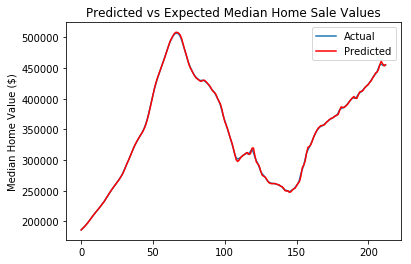

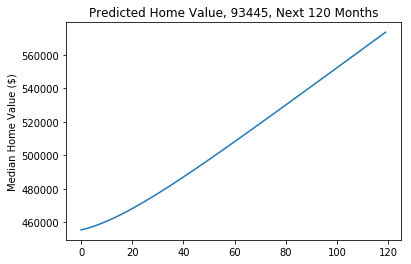

Current Avg Median Home Value in 93445: $454600.00
Predicted Avg Median Home Value for 93445 in April 2019: $461232.53
Expected property value appreciation for 1 year in 93445 :  $6632.53
Expected Return on Investment after 1 year:  1.4590%
Expected property value appreciation for 3 years in 93445 :  $27417.69
Expected Return on Investment after 5 years:  6.0312%
Expected property value appreciation for 10 years in 93445 :  $119050.14
Expected Return on Investment after 10 years:  26.1879%


In [54]:
fit_model(df_93445, '93445')

/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/james/anaconda3/lib/p

Predicted: [162815.43798426] 	 Expected: 163000.0
MSE for Test Set: 553057.6349108396


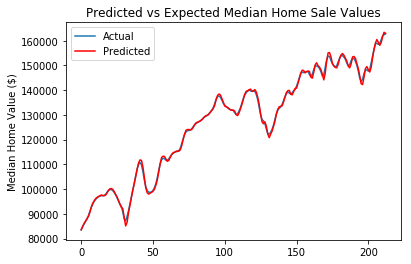

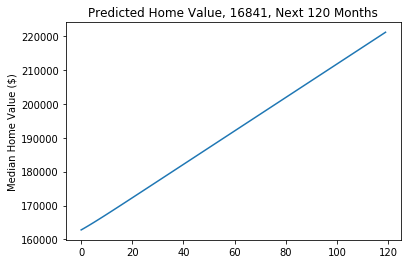

Current Avg Median Home Value in 16841: $163000.00
Predicted Avg Median Home Value for 16841 in April 2019: $167902.04
Expected property value appreciation for 1 year in 16841 :  $4902.04
Expected Return on Investment after 1 year:  3.0074%
Expected property value appreciation for 3 years in 16841 :  $16684.02
Expected Return on Investment after 5 years:  10.2356%
Expected property value appreciation for 10 years in 16841 :  $58104.03
Expected Return on Investment after 10 years:  35.6466%


In [55]:
fit_model(df_16841, '16841')

Predicted: [125879.5411086] 	 Expected: 127100.0
MSE for Test Set: 165166.04484077042


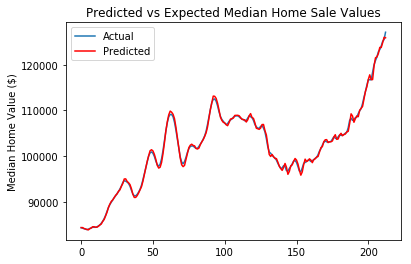

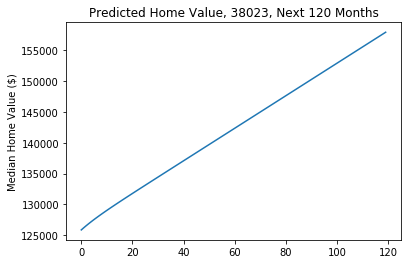

Current Avg Median Home Value in 38023: $127100.00
Predicted Avg Median Home Value for 38023 in April 2019: $129325.19
Expected property value appreciation for 1 year in 38023 :  $2225.19
Expected Return on Investment after 1 year:  1.7507%
Expected property value appreciation for 3 years in 38023 :  $8652.54
Expected Return on Investment after 5 years:  6.8077%
Expected property value appreciation for 10 years in 38023 :  $30769.60
Expected Return on Investment after 10 years:  24.2090%


In [56]:
fit_model(df_38023, '38023')

Predicted: [126091.46216957] 	 Expected: 125900.0
MSE for Test Set: 324963.61748714617


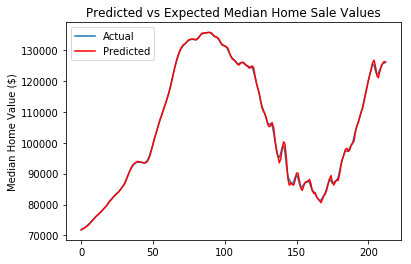

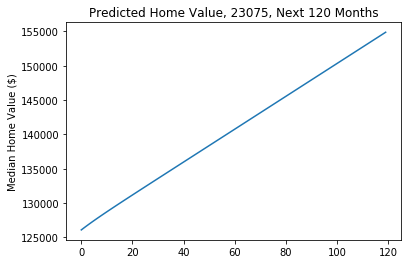

Current Avg Median Home Value in 23075: $125900.00
Predicted Avg Median Home Value for 23075 in April 2019: $128982.24
Expected property value appreciation for 1 year in 23075 :  $3082.24
Expected Return on Investment after 1 year:  2.4482%
Expected property value appreciation for 3 years in 23075 :  $8883.54
Expected Return on Investment after 5 years:  7.0560%
Expected property value appreciation for 10 years in 23075 :  $28984.39
Expected Return on Investment after 10 years:  23.0218%


In [57]:
fit_model(df_23075, '23075')

/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/home/james/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/home/james/anaconda3/lib/p

Predicted: [115804.20493759] 	 Expected: 115000.0
MSE for Test Set: 78262.42446167853


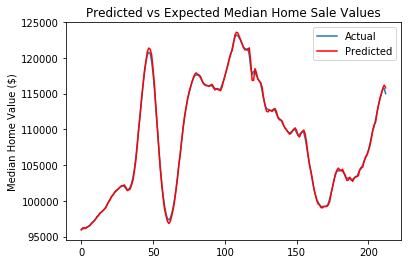

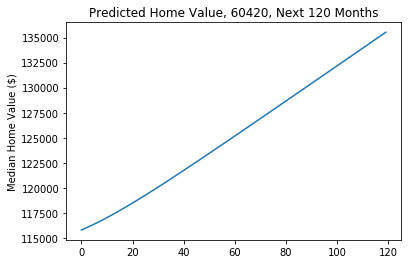

Current Avg Median Home Value in 60420: $115000.00
Predicted Avg Median Home Value for 60420 in April 2019: $117169.83
Expected property value appreciation for 1 year in 60420 :  $2169.83
Expected Return on Investment after 1 year:  1.8868%
Expected property value appreciation for 3 years in 60420 :  $5906.05
Expected Return on Investment after 5 years:  5.1357%
Expected property value appreciation for 10 years in 60420 :  $20527.71
Expected Return on Investment after 10 years:  17.8502%


In [58]:
fit_model(df_60420, '60420')

# Step 6: Interpreting Results

In [59]:
#---ROI mean---

#Take last 10 years of data
zillow_df_last10_yrs = zillow_df[['2008-04','2018-04']]

#Get ROIs for each zip
zillow_df_sorted_ROI1

#Get mean ROI of entire dataset
get_ROI(zillow_df_sorted_ROI1).mean()

NameError: name 'zillow_df_sorted_ROI1' is not defined